In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_ophys_experiment import BehaviorOphysExperiment
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import os

import allensdk
import pkg_resources

import yaml

# Suppress all warnings because there are a lot of annoying user warnings
import warnings
warnings.filterwarnings("ignore")

# Setting up InteractiveShell for better df visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


print("Import confirmed")
print("Allensdk version : ", allensdk.__version__)

Import confirmed
Allensdk version :  2.16.2


In [2]:
# Define the directory for the cache to prevent downloading every time
cache_dir = "./visual_behavior_cache"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [3]:
# Load experiment metadata
experiments_table = cache.get_ophys_experiment_table()

# Select a specific experiment by ID
experiment_id = experiments_table.index[0]  # Example: take the first experiment

experiments_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,imaging_depth,targeted_structure,targeted_imaging_depth,imaging_plane_group,project_code,session_type,session_number,image_set,behavior_type,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISp,150,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISp,225,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,75,VISp,75,1,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISl,150,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISl,225,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [4]:
# loading cache of a single experiment to explore
experiment = cache.get_behavior_ophys_experiment(experiment_id)

In [5]:
# metadata of single experiment
experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzlocal()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

From the metadata we know that this is a Multiscope experiment where 2 areas at 4 different depths were measured.

In [6]:
# Preview of stimuli dataframe
stimulus_table = experiment.stimulus_presentations
stimulus_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.311855,0.000000,309.311855,0,17985,False,<NA>,<NA>,-99,0,-99,False,spontaneous,False
1,1,change_detection_behavior,0,im065,-99,0.250210,309.311855,309.562065,17985,18000,False,False,False,-99,1,0,False,Natural_Images_Lum_Matched_set_training_2017,True
2,1,change_detection_behavior,0,im065,-99,0.250230,310.062485,310.312715,18030,18045,False,False,False,-99,2,0,False,Natural_Images_Lum_Matched_set_training_2017,True
3,1,change_detection_behavior,0,im065,-99,0.250210,310.813105,311.063315,18075,18090,False,False,False,-99,3,0,False,Natural_Images_Lum_Matched_set_training_2017,True
4,1,change_detection_behavior,0,im065,-99,0.250200,311.563725,311.813925,18120,18135,False,False,False,-99,4,0,False,Natural_Images_Lum_Matched_set_training_2017,True


In [7]:
# Preview of dff_trace dataframe
dff_table = experiment.dff_traces
dff_table.head()
print(f"Shape of dff signals : {dff_table['dff'].iloc[0].shape}")

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


Shape of dff signals : (48316,)


We can confirm that there are indeed roughly 11 frames per second per neuron during the whole experiment if we divide the lenght of the dff array by the max value of end_time. Hence the signals should be evenly spread across the whole timescale.

In [8]:
# Preview of event dataframe
event_table = experiment.events
event_table.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086613265,1080743723,"[0.0, 0.0, 0.5568727052177824, 0.0, 0.46726365...","[0.0, 0.0, 0.40076209492295517, 0.148502141158...",0.0484,0.068267
1086613823,1080743752,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1441,0.118111
1086619526,1080743754,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0966,0.097046
1086614149,1080743763,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0771,0.086072
1086614351,1080743765,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0801,0.088142


In [9]:
# Preview of running speed dataframe
running_speed_table = experiment.running_speed
running_speed_table

,timestamps,speed
0,6.87653,0.039084
1,9.28021,1.448758
2,9.29687,2.724152
3,9.31357,3.763775
4,9.33024,4.505150
...,...,...
270048,4513.74432,0.994029
270049,4513.76099,1.565881
270050,4513.77764,2.329033
270051,4513.79435,3.250289


Not included in metadata but running speed is roughly measured every at 60hz. (270053/4513). However the measurements don't seem to be perfectly spread out.

In [10]:
stimulus_templates = experiment.stimulus_templates
images = stimulus_table["image_name"]
stimulus_templates.index

Index(['im065', 'im077', 'im066', 'im061', 'im063', 'im062', 'im085', 'im069'], dtype='object', name='image_name')

(1200, 1920)


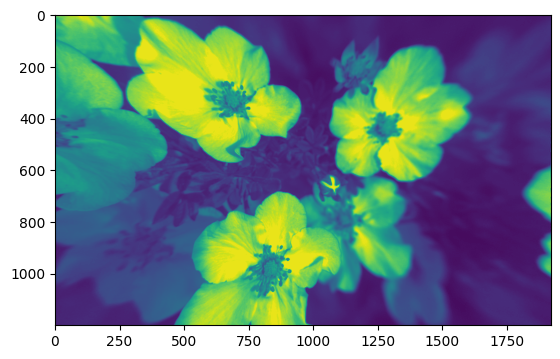

In [11]:
#for image in stimulus_templates.index.unique():
    #print(image)

#showcase of a single stimulus image
plt.imshow(stimulus_templates.iloc[0]["warped"])
print(stimulus_templates.iloc[0]["warped"].shape)

(900, 304, 608)


(-0.5, 607.5, 303.5, -0.5)

Text(0.5, 1.0, 'frame 200')

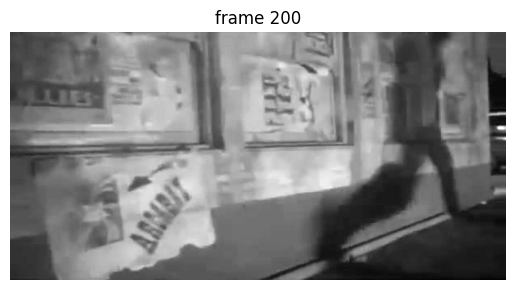

In [12]:
# trying to get the movie data to load
#I have not found a way to do this using the previous data module I used. I believe that they are the "light" versions which do not contain
# all the data. Since there are only 3 movies I will use other experiments to get the three movies as I need them.

# http://alleninstitute.github.io/AllenSDK/_static/examples/nb/brain_observatory_stimuli.html only source I could find that worked

boc = BrainObservatoryCache()

# This index contains movie 1 and 3
data_set = boc.get_ophys_experiment_data(501940850)

# read in the natural movie one clip
movie = data_set.get_stimulus_template('natural_movie_one')
print(movie.shape)

# display a random frame for reference
frame = 200
plt.imshow(movie[frame,:,:], cmap='gray')
plt.axis('off')
plt.title('frame %d' % frame)
plt.show()

In [13]:
# Here we can see that the movie was shown 10 times. Hence it makes sense that there are 9000 rows with the movie since the movie is
# 900 frames long.

natural_movie_one_rows = stimulus_table.loc[
    stimulus_table['movie_frame_index'] == 0
]
natural_movie_one_rows

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
4803,3,natural_movie_one,-99,NaN,0,0.03336,4213.618915,4213.652275,252052,252053,False,<NA>,<NA>,0,7,-99,False,natural_movie_one,False
5703,3,natural_movie_one,-99,NaN,0,0.03335,4243.643455,4243.676805,253852,253853,False,<NA>,<NA>,1,907,-99,False,natural_movie_one,False
6603,3,natural_movie_one,-99,NaN,0,0.03333,4273.667985,4273.701315,255652,255653,False,<NA>,<NA>,2,1807,-99,False,natural_movie_one,False
7503,3,natural_movie_one,-99,NaN,0,0.03339,4303.692495,4303.725885,257452,257453,False,<NA>,<NA>,3,2707,-99,False,natural_movie_one,False
8403,3,natural_movie_one,-99,NaN,0,0.03339,4333.717025,4333.750415,259252,259253,False,<NA>,<NA>,4,3607,-99,False,natural_movie_one,False
9303,3,natural_movie_one,-99,NaN,0,0.03337,4363.741585,4363.774955,261052,261053,False,<NA>,<NA>,5,4507,-99,False,natural_movie_one,False
10203,3,natural_movie_one,-99,NaN,0,0.03338,4393.766105,4393.799485,262852,262853,False,<NA>,<NA>,6,5407,-99,False,natural_movie_one,False
11103,3,natural_movie_one,-99,NaN,0,0.03334,4423.790635,4423.823975,264652,264653,False,<NA>,<NA>,7,6307,-99,False,natural_movie_one,False
12003,3,natural_movie_one,-99,NaN,0,0.03339,4453.815145,4453.848535,266452,266453,False,<NA>,<NA>,8,7207,-99,False,natural_movie_one,False


In [33]:
stimulus_table.head(12)
stimulus_table['stimulus_block_name'].unique()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
13791,3,natural_movie_one,-99,NaN,888,0.03337,4513.463895,4513.497265,270028,270029,False,<NA>,<NA>,9,8995,-99,False,natural_movie_one,False
13792,3,natural_movie_one,-99,NaN,889,0.03332,4513.497265,4513.530585,270030,270031,False,<NA>,<NA>,9,8996,-99,False,natural_movie_one,False
13793,3,natural_movie_one,-99,NaN,890,0.03339,4513.530585,4513.563975,270032,270033,False,<NA>,<NA>,9,8997,-99,False,natural_movie_one,False
13794,3,natural_movie_one,-99,NaN,891,0.03337,4513.563975,4513.597345,270034,270035,False,<NA>,<NA>,9,8998,-99,False,natural_movie_one,False
13795,3,natural_movie_one,-99,NaN,892,0.03333,4513.597345,4513.630675,270036,270037,False,<NA>,<NA>,9,8999,-99,False,natural_movie_one,False
13796,3,natural_movie_one,-99,NaN,893,0.03339,4513.630675,4513.664065,270038,270039,False,<NA>,<NA>,9,9000,-99,False,natural_movie_one,False
13797,3,natural_movie_one,-99,NaN,894,0.03336,4513.664065,4513.697425,270040,270041,False,<NA>,<NA>,9,9001,-99,False,natural_movie_one,False
13798,3,natural_movie_one,-99,NaN,895,0.03333,4513.697425,4513.730755,270042,270043,False,<NA>,<NA>,9,9002,-99,False,natural_movie_one,False
13799,3,natural_movie_one,-99,NaN,896,0.03339,4513.730755,4513.764145,270044,270045,False,<NA>,<NA>,9,9003,-99,False,natural_movie_one,False


array(['initial_gray_screen_5min', 'change_detection_behavior',
       'post_behavior_gray_screen_5min', 'natural_movie_one'],
      dtype=object)

In [47]:
### function for creating directory structure

def create_directory_structure(base_dir):
    # Define the top-level subdirectories
    subdirectories = ['eye_tracker', 'responses', 'screen', 'treadmill']
    
    for subdir in subdirectories:
        # Path for the top-level subdirectory
        subdir_path = os.path.join(base_dir, subdir)
        
        # Create the top-level subdirectory
        os.makedirs(subdir_path, exist_ok=True)
        
        # Define the second-level subdirectory: "meta" for all except "screen"
        if subdir == 'screen':
            second_level_subdirs = ['meta', 'data']
        else:
            second_level_subdirs = ['meta']
        
        for second_level_subdir in second_level_subdirs:
            # Path for the second-level subdirectory
            second_level_path = os.path.join(subdir_path, second_level_subdir)
            
            # Create the second-level subdirectory
            os.makedirs(second_level_path, exist_ok=True)

            if second_level_subdir == 'meta':
                with open(second_level_path+".yml", 'w') as file:
                    yaml.dump({}, file, default_flow_style=False)
            
            #print(f"Created {second_level_path}")
    
    print(f"Directory structure created at {base_dir}")

In [78]:
# function to make data and yaml files for visual stimuli

def write_yaml(data, file_name):
    # Write the row data to the YAML file
    with open(file_name, 'w') as file:
        yaml.dump(data, file, default_flow_style=False)


# check which of these hyperparameters is actually not correct for all data and fix
def stimuli_export(stimuli, templates, output_dir, frame_rate=60,
                   blank_period=0.5, presentation_time=0.25, image_size=[1200, 1900], interleave_value = 128):

    # make main_yml file with infos for all stimuli
    main_yml = os.path.join(output_dir, "meta.yml")
    meta_dict = {
        'modality': 'screen',
        'interleave_value': interleave_value,
        'tier': 'training'
    }
    
    write_yaml(meta_dict, main_yml)

    columns = ['image_name', 'duration', 'stimulus_block_name']
    frame_counter = 0
    trial_index = 0
    file_counter = 0
    was_stimuli = False
    prev_end_time = 0
    
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        print("Please run th create_directory_structure function first.")
    
    for idx, row in tqdm(stimuli.iterrows(), desc="processing data"):

        # constructing file name and getting data
        yaml_filename = os.path.join(output_dir, f"meta/{file_counter:05}.yaml")
        npy_filename = os.path.join(output_dir, f"data/{file_counter:05}.npy")
        image_name = row['image_name']
        is_string = isinstance(image_name, str)

        # stimuli is image
        if is_string and 'im' in image_name:
            # get image
            img = stimulus_templates.loc[image_name]["warped"]
            
            # make data for blank yaml if the previous row was image
            if was_stimuli:
                data_grey = {
                    'first_frame_index': frame_counter,
                    'image_size': image_size,
                    'modality': 'blank',
                    'num_frames': 1
                }
                write_yaml(data_grey, yaml_filename)

                # update filename
                file_counter += 1
                frame_counter +=1
                yaml_filename = os.path.join(output_dir, f"meta/{file_counter:05}.yaml")
                npy_filename = os.path.join(output_dir, f"data/{file_counter:05}.npy")

            
            # get current stimuli template
            img = stimulus_templates.loc[image_name]["warped"]
            np.save(npy_filename, img)

            img_data = {
                col: row[col] for col in columns} | {
                'modality': 'image',
                'frame_counter': frame_counter,
                'trial_index': trial_index,
                'num_frames': 1,
                'image_size': image_size,
                'pre_blank_period': row['start_time'] - prev_end_time
            }
            
            # make data for image yaml
            write_yaml(img_data, yaml_filename)
            was_stimuli = True
            trial_index += 1
            prev_end_time = row['end_time']


        # stimuli is grey_screen might have to watchout for image_size and interleave_value
        elif is_string and 'omitted' in image_name or np.isnan(image_name) and 'gray_screen' in row['stimulus_block_name']:
            data_grey = {
                    'first_frame_index': frame_counter,
                    'image_size': image_size,
                    'modality': 'blank',
                    'num_frames': 1
                }
            write_yaml(data_grey, yaml_filename)
            frame_counter +=1
            prev_end_time = row['start_time']

            if is_string:
                was_stimuli = True

            else:
                was_stimuli = False

        # stimuli is video
        else:

            if row['movie_frame_index'] != 0:
                continue

            # add grey screen if previous stimuli is image
            if was_stimuli:
                data_grey = {
                    'first_frame_index': frame_counter,
                    'image_size': image_size,
                    'modality': 'blank',
                    'num_frames': 1
                }
                write_yaml(data_grey, yaml_filename)
                
                file_counter += 1
                frame_counter +=1
                yaml_filename = os.path.join(output_dir, f"meta/{file_counter:05}.yaml")
                npy_filename = os.path.join(output_dir, f"data/{file_counter:05}.npy")

            # write yaml and data for video

            #movie = np.load(f'movies/{row[stimulus_block_name]}.npy')
            mv_size = movie.shape
            
            mv_data = {
                'modality': 'video',
                'first_frame_idx': frame_counter,
                'trial_index': trial_index,
                'num_frames': mv_size[0],
                'image_size': mv_size[:1],
                'pre_blank_period': row['start_time'] - prev_end_time
            }

            np.save(npy_filename, movie)


            write_yaml(mv_data, yaml_filename)
            was_stimuli = True
            trial_index += 1
            prev_end_time = row['end_time']

        file_counter += 1
        frame_counter +=1

In [80]:
# basic setup
!rm -r example_experiment
base_directory = 'example_experiment'
create_directory_structure(base_directory)

# exporting tows of a single experiment
stimuli_export(stimulus_table, stimulus_templates, 'example_experiment/screen')

Directory structure created at example_experiment


# desired file strucutre and their contents

- eye_tracker
    - meta.yml 
    - data.mem

- responses
    - meta.yml 
    - data.mem

- screen
    - data (contains npy files for each image/video)
    - meta (contains .yml files for each corresponding npy file and for grey_screens(which are not saved as npy file)
        - first_frame
        - image_id
        - modality
        - trial_idx
    - meta.yml (overlying meta file for all data)
        - image_size
        - presentation_time
        - framerate
- treadmill
    - data.mem
    - meta.yml